# **Procesamiento de los datos**

### **Librerias**

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import anderson
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from PIL import Image as PILImage
import os


In [3]:

#Cargar los datasets
df1 = pd.read_csv("train_transaction.csv")
df2 = pd.read_csv("train_identity.csv")


#Exploración inicial
print("Primer dataset:")
print(df1.head())
print(df1.info())


Primer dataset:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  N

In [4]:
print("\nSegundo dataset:")
print(df2.head())
print(df2.info())


Segundo dataset:
   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType

In [5]:
# Convertir nombres de columnas a minúsculas
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
# Revisar si hay duplicados por TransactionID
print("Duplicados en df1:", df1.duplicated(subset='transactionid').sum())
print("Duplicados en df2:", df2.duplicated(subset='transactionid').sum())

Duplicados en df1: 0
Duplicados en df2: 0


In [6]:
# Mostrar todas las filas sin truncamiento
pd.set_option('display.max_rows', None)

# Volver a imprimir el resultado completo
print("Porcentaje de valores nulos en df2 (train_transaction):")
missing_df1 = df1.isnull().mean().sort_values(ascending=False) * 100
print(missing_df1[missing_df1 > 0].round(2))

Porcentaje de valores nulos en df2 (train_transaction):
dist2            93.63
d7               93.41
d13              89.51
d14              89.47
d12              89.04
d6               87.61
d9               87.31
d8               87.31
v153             86.12
v139             86.12
v162             86.12
v161             86.12
v154             86.12
v138             86.12
v158             86.12
v157             86.12
v163             86.12
v156             86.12
v155             86.12
v149             86.12
v148             86.12
v147             86.12
v146             86.12
v142             86.12
v141             86.12
v140             86.12
v151             86.12
v152             86.12
v145             86.12
v144             86.12
v150             86.12
v143             86.12
v160             86.12
v166             86.12
v164             86.12
v159             86.12
v165             86.12
v322             86.05
v332             86.05
v338             86.05
v337             86.05
v

In [7]:
# Mostrar todas las filas sin truncamiento
pd.set_option('display.max_rows', None)

# Volver a imprimir el resultado completo
print("Porcentaje de valores nulos en df2 (train_transaction):")
missing_df2 = df2.isnull().mean().sort_values(ascending=False) * 100
print(missing_df2[missing_df2 > 0].round(2))

Porcentaje de valores nulos en df2 (train_transaction):
id_24         96.71
id_25         96.44
id_07         96.43
id_08         96.43
id_21         96.42
id_26         96.42
id_23         96.42
id_27         96.42
id_22         96.42
id_18         68.72
id_03         54.02
id_04         54.02
id_33         49.19
id_09         48.05
id_10         48.05
id_30         46.22
id_32         46.21
id_34         46.06
id_14         44.50
deviceinfo    17.73
id_13         11.73
id_16         10.33
id_06          5.11
id_05          5.11
id_20          3.45
id_19          3.41
id_17          3.37
id_31          2.74
devicetype     2.37
id_02          2.33
id_28          2.26
id_29          2.26
id_11          2.26
id_15          2.25
id_35          2.25
id_36          2.25
id_37          2.25
id_38          2.25
dtype: float64


In [8]:
# Verificar nombres en df1 y df2
print(df1.columns.tolist())
print(df2.columns.tolist())


['transactionid', 'isfraud', 'transactiondt', 'transactionamt', 'productcd', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'p_emaildomain', 'r_emaildomain', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v

In [9]:
# Realizar el merge tipo LEFT JOIN
df_full = pd.merge(df2, df1, on='transactionid', how='left')

# Verificar dimensiones del nuevo DataFrame
print("Dimensiones del dataframe combinado:")
print(df_full.shape)

# Ver primeras filas
#df_full.head()
df_full.describe()


Dimensiones del dataframe combinado:
(144233, 434)


,transactionid,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,4.735065,6222.466950,11181.344838,7964.623789,244.320100,388.035252,275.048519,669.707372,1096.739466,816.354359
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.000000,55125.000000,104060.000000,104060.000000,104060.000000


In [10]:
df_full.select_dtypes(include='object').describe()


,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,...,r_emaildomain,m1,m2,m3,m4,m5,m6,m7,m8,m9
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,...,131083,0,0,0,60831,0,0,0,0,0
unique,2,3,2,3,2,2,2,75,130,260,...,60,0,0,0,3,0,0,0,0,0
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,...,gmail.com,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,...,55079,NaN,NaN,NaN,50300,NaN,NaN,NaN,NaN,NaN


Ya combinados los dataframes, se procede a verificar de manera completa la cantidad de valores nulos por columnas. 

In [11]:
# Calcular número y porcentaje de nulos por columna
nulos_abs = df_full.isnull().sum()
nulos_pct = df_full.isnull().mean() * 100

# Crear DataFrame combinado
missing_df = pd.DataFrame({
    'missing_count': nulos_abs,
    'missing_percentage': nulos_pct
})

# Filtrar solo columnas con al menos 1 valor nulo
missing_df = missing_df[missing_df['missing_count'] > 0]

# Ordenar de mayor a menor porcentaje
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

missing_df

# Ver tabla
import pandas as pd
from IPython.display import display
pd.set_option('display.max_rows', None)
display(missing_df.round(2))
print(f"Columnas con al menos un valor nulo: {missing_df.shape[0]}")

,missing_count,missing_percentage
v11,144233,100.00
m9,144233,100.00
d11,144233,100.00
v8,144233,100.00
v7,144233,100.00
v6,144233,100.00
v5,144233,100.00
v4,144233,100.00
v9,144233,100.00
v2,144233,100.00


Columnas con al menos un valor nulo: 412


In [12]:
# Calcular número y porcentaje de nulos por columna
nulos_abs = df_full.isnull().sum()
nulos_pct = df_full.isnull().mean() * 100

# Crear DataFrame combinado
missing_df = pd.DataFrame({
    'missing_count': nulos_abs,
    'missing_percentage': nulos_pct
})

# Filtrar solo columnas con al menos 1 valor nulo
missing_df = missing_df[missing_df['missing_count'] > 0]

# Ordenar de mayor a menor porcentaje
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

print(missing_df)
print(f"Columnas con al menos un valor nulo: {missing_df.shape[0]}")

               missing_count  missing_percentage
v11                   144233          100.000000
m9                    144233          100.000000
d11                   144233          100.000000
v8                    144233          100.000000
v7                    144233          100.000000
v6                    144233          100.000000
v5                    144233          100.000000
v4                    144233          100.000000
v9                    144233          100.000000
v2                    144233          100.000000
v1                    144233          100.000000
v3                    144233          100.000000
m8                    144233          100.000000
m7                    144233          100.000000
m1                    144233          100.000000
m2                    144233          100.000000
m3                    144233          100.000000
v10                   144233          100.000000
dist1                 144233          100.000000
m5                  

In [13]:
# Filtrar las columnas con 100% de nulos
cols_100_null = missing_df[missing_df['missing_percentage'] == 100].index

# Ver cuántas son
print(f"Columnas con 100% de nulos a eliminar: {len(cols_100_null)}")

# Eliminar del DataFrame principal
df_full = df_full.drop(columns=cols_100_null)

# Ver nueva forma del DataFrame
print("Nueva dimensión de df_full:")
print(df_full.shape)


Columnas con 100% de nulos a eliminar: 21
Nueva dimensión de df_full:
(144233, 413)


Se eliminaron un total de 21 columnas del conjunto de datos combinado df_full debido a que presentaban el 100% de sus valores como faltantes (NaN).
Estas columnas no contienen ninguna información observable que pueda ser utilizada para análisis exploratorio, imputación, o modelado, y por tanto, no aportan valor al proceso de detección de fraude. Además, no es posible aplicar técnicas de imputación, codificación ni análisis de correlación sobre variables completamente vacías.

In [14]:
print(df_full.columns.tolist())
print(f"Número total de columnas: {len(df_full.columns)}")


['transactionid', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'devicetype', 'deviceinfo', 'isfraud', 'transactiondt', 'transactionamt', 'productcd', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist2', 'p_emaildomain', 'r_emaildomain', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd12', 'd13', 'd14', 'd15', 'm4', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v

In [15]:
# Eliminar columnas con más del 90% de valores nulos sin errores
df_full = df_full.dropna(axis=1, thresh=int(len(df_full) * 0.10))

print(f"Dimensión del DataFrame después de eliminar columnas con >90% nulos: {df_full.shape}")


Dimensión del DataFrame después de eliminar columnas con >90% nulos: (144233, 404)


In [16]:
# Clasificación de columnas según el diccionario del dataset (ajustado a nombres en minúscula y sin solapamientos)

# Listado completo de columnas
cols = df_full.columns

# Inicializar conjunto de columnas ya clasificadas
asignadas = set()

# Clasificarlas por prefijo sin duplicados
cols_base = [col for col in ['transactionid', 'transactiondt', 'transactionamt', 'productcd', 'isfraud'] if col in cols and col not in asignadas]
asignadas.update(cols_base)

cols_card = [col for col in cols if col.startswith('card') and col not in asignadas]
asignadas.update(cols_card)

cols_addr = [col for col in cols if col.startswith('addr') and col not in asignadas]
asignadas.update(cols_addr)

cols_dist = [col for col in cols if col.startswith('dist') and col not in asignadas]
asignadas.update(cols_dist)

cols_email = [col for col in cols if 'emaildomain' in col and col not in asignadas]
asignadas.update(cols_email)

cols_C = [col for col in cols if col.startswith('c') and col not in asignadas]
asignadas.update(cols_C)

cols_device = [col for col in ['devicetype', 'deviceinfo'] if col in cols and col not in asignadas]
asignadas.update(cols_device)

cols_D = [col for col in cols if col.startswith('d') and col not in asignadas]
asignadas.update(cols_D)

cols_M = [col for col in cols if col.startswith('m') and col not in asignadas]
asignadas.update(cols_M)

cols_V = [col for col in cols if col.startswith('v') and col not in asignadas]
asignadas.update(cols_V)

cols_id = [col for col in cols if col.startswith('id_') and col not in asignadas]
asignadas.update(cols_id)



# Diccionario final sin duplicados
column_groups = {
    'base': cols_base,
    'card': cols_card,
    'addr': cols_addr,
    'dist': cols_dist,
    'emaildomain': cols_email,
    'c': cols_C,
    'd': cols_D,
    'm': cols_M,
    'v': cols_V,
    'id': cols_id,
    'device': cols_device
}

# Mostrar resumen de grupos
for group, col_list in column_groups.items():
    print(f"{group}: {len(col_list)} columnas → {col_list[:5]}{'...' if len(col_list) > 5 else ''}")

# Mostrar total de columnas únicas agrupadas
print(f"\nTotal de columnas agrupadas sin duplicados: {sum(len(v) for v in column_groups.values())}")


base: 5 columnas → ['transactionid', 'transactiondt', 'transactionamt', 'productcd', 'isfraud']
card: 6 columnas → ['card1', 'card2', 'card3', 'card4', 'card5']...
addr: 2 columnas → ['addr1', 'addr2']
dist: 1 columnas → ['dist2']
emaildomain: 2 columnas → ['p_emaildomain', 'r_emaildomain']
c: 14 columnas → ['c1', 'c2', 'c3', 'c4', 'c5']...
d: 14 columnas → ['d1', 'd2', 'd3', 'd4', 'd5']...
m: 1 columnas → ['m4']
v: 328 columnas → ['v12', 'v13', 'v14', 'v15', 'v16']...
id: 29 columnas → ['id_01', 'id_02', 'id_03', 'id_04', 'id_05']...
device: 2 columnas → ['devicetype', 'deviceinfo']

Total de columnas agrupadas sin duplicados: 404


In [17]:
# Calcular número y porcentaje de nulos por columna
nulos_abs = df_full.isnull().sum()
nulos_pct = df_full.isnull().mean() * 100

# Crear DataFrame combinado
missing_df = pd.DataFrame({
    'missing_count': nulos_abs,
    'missing_percentage': nulos_pct
})

# Filtrar solo columnas con al menos 1 valor nulo
missing_df = missing_df[missing_df['missing_count'] > 0]

# Ordenar de mayor a menor porcentaje
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

print(missing_df)
print(f"Columnas con al menos un valor nulo: {missing_df.shape[0]}")

               missing_count  missing_percentage
d3                    115174           79.852738
d2                    113117           78.426574
d5                    111158           77.068355
d7                    108093           74.943321
dist2                 106640           73.935923
id_18                  99120           68.722137
d12                    85324           59.157058
m4                     83402           57.824492
d13                    82297           57.058371
d14                    82068           56.899600
v50                    79488           55.110828
v49                    79488           55.110828
v48                    79488           55.110828
v44                    79488           55.110828
v47                    79488           55.110828
v46                    79488           55.110828
v45                    79488           55.110828
v35                    79488           55.110828
v43                    79488           55.110828
v42                 

In [18]:
# Ver de que tipos son las columnas
print(df_full.dtypes)

transactionid       int64
id_01             float64
id_02             float64
id_03             float64
id_04             float64
id_05             float64
id_06             float64
id_09             float64
id_10             float64
id_11             float64
id_12              object
id_13             float64
id_14             float64
id_15              object
id_16              object
id_17             float64
id_18             float64
id_19             float64
id_20             float64
id_28              object
id_29              object
id_30              object
id_31              object
id_32             float64
id_33              object
id_34              object
id_35              object
id_36              object
id_37              object
id_38              object
devicetype         object
deviceinfo         object
isfraud             int64
transactiondt       int64
transactionamt    float64
productcd          object
card1               int64
card2             float64
card3       

In [19]:
# Calcular porcentaje de nulos
nulos_pct = df_full.isnull().mean() * 100

# Filtrar columnas con más del 50%
cols_50plus = nulos_pct[nulos_pct > 50].index.tolist()

print(f"Columnas con más del 50% de nulos: {len(cols_50plus)}")


Columnas con más del 50% de nulos: 99


In [20]:
analizadas = []
for col in cols_50plus:
    if df_full[col].nunique(dropna=True) <= 20:  # solo si tiene pocos valores únicos
        print(f"\nAnálisis de {col}")
        print("Valores únicos (sin NA):", df_full[col].nunique(dropna=True))
        print("Distribución de fraude por categoría:")
        print(df_full.groupby(col)['isfraud'].mean().sort_values(ascending=False).round(3))
        analizadas.append(col)

print(f"\nTotal de variables analizadas: {len(analizadas)}")


Análisis de id_04
Valores únicos (sin NA): 15
Distribución de fraude por categoría:
id_04
-11.0    0.629
-12.0    0.618
-13.0    0.583
-8.0     0.469
-2.0     0.467
-10.0    0.333
-9.0     0.231
-7.0     0.190
-4.0     0.157
-6.0     0.112
 0.0     0.106
-3.0     0.100
-5.0     0.098
-28.0    0.000
-1.0     0.000
Name: isfraud, dtype: float64

Análisis de id_18
Valores únicos (sin NA): 18
Distribución de fraude por categoría:
id_18
29.0    0.333
11.0    0.194
24.0    0.115
20.0    0.106
15.0    0.102
18.0    0.065
27.0    0.062
12.0    0.057
13.0    0.056
17.0    0.026
26.0    0.022
21.0    0.013
14.0    0.000
16.0    0.000
23.0    0.000
25.0    0.000
28.0    0.000
10.0    0.000
Name: isfraud, dtype: float64

Análisis de m4
Valores únicos (sin NA): 3
Distribución de fraude por categoría:
m4
M1    0.126
M2    0.125
M0    0.115
Name: isfraud, dtype: float64

Análisis de v12
Valores únicos (sin NA): 1
Distribución de fraude por categoría:
v12
0.0    0.108
Name: isfraud, dtype: float64

A

In [21]:
# Eliminar variables con un solo valor único
vars_un_valor = [col for col in analizadas if df_full[col].nunique(dropna=True) == 1]

#  Eliminar variables donde todas las categorías tienen tasa de fraude 0.0
vars_sin_fraude = []
for col in analizadas:
    fraude_rates = df_full.groupby(col)['isfraud'].mean()
    if all(fraude_rates == 0):
        vars_sin_fraude.append(col)

# Unir todas las variables a eliminar
vars_a_eliminar = list(set(vars_un_valor + vars_sin_fraude))

# Eliminar del dataframe
df_reducido = df_full.drop(columns=vars_a_eliminar)

# Mostrar resultado
print(f"Variables eliminadas: {len(vars_a_eliminar)}")
print(vars_a_eliminar)
print(f"Shape original: {df_full.shape}")
print(f"Shape reducido: {df_reducido.shape}")


Variables eliminadas: 16
['v29', 'v76', 'v30', 'v53', 'v75', 'v35', 'v48', 'v12', 'v36', 'v91', 'v49', 'v90', 'v70', 'v54', 'v69', 'v13']
Shape original: (144233, 404)
Shape reducido: (144233, 388)


Como parte del preprocesamiento inicial del conjunto de datos, se implementó un análisis exploratorio orientado a reducir la dimensionalidad, específicamente sobre las variables con 50 o más valores únicos (`cols_50plus`). Se aplicó un filtro para analizar únicamente aquellas variables que poseían **20 o menos valores únicos distintos** (sin contar los valores faltantes). Este criterio no discrimina según el tipo de dato (`float`, `object`, etc.), sino que se basa en la **cardinalidad efectiva** observada. Por lo tanto, se incluyeron tanto variables categóricas como numéricas que, en la práctica, presentaban un comportamiento discreto.

El análisis consistió en calcular la **proporción de fraude (`isfraud`) asociada a cada valor** dentro de dichas variables, mediante la agregación `groupby(col)['isfraud'].mean()`. Esto permitió detectar variables que **no mostraban variación informativa** relevante para el objetivo de clasificación. Entre ellas, podemos notar casos como la variable `v12` presentaba un único valor (`0.0`) con una tasa de fraude constante (0.108). Las variables `v29`, `v69`, `v70`, `v76`, entre otras, también contenían un solo valor o múltiples categorías cuya tasa de fraude era nula o constante. 

Estas características indican que dichas variables **no aportan capacidad de discriminación** al modelo y podrían incluso introducir ruido o sobreajuste en etapas posteriores. Como resultado de este proceso, se procedió a **eliminar 16 variables** que cumplían con este perfil. El conjunto de datos se redujo de **404 a 388 columnas**, lo que representa una segunda etapa de depuración antes de aplicar técnicas más avanzadas de reducción de multicolinealidad como el **Variance Inflation Factor (VIF)**. Esta limpieza inicial es clave para facilitar la interpretación del VIF y evitar que variables carentes de significado influyan artificialmente en su cálculo.


In [22]:
# Identificar variables con más del 50% de NA
na_50plus_restantes = df_reducido.columns[df_reducido.isna().mean() > 0.5]

# Mostrar cantidad y nombres
print(f"Variables con más del 50% de NA que aún permanecen: {len(na_50plus_restantes)}")
print(na_50plus_restantes.tolist())


Variables con más del 50% de NA que aún permanecen: 83
['id_03', 'id_04', 'id_18', 'dist2', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd10', 'd12', 'd13', 'd14', 'd15', 'm4', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v31', 'v32', 'v33', 'v34', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v50', 'v51', 'v52', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v71', 'v72', 'v73', 'v74', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v92', 'v93', 'v94']


In [23]:
variables_50na = na_50plus_restantes.tolist()

numericas_50na = [col for col in variables_50na if pd.api.types.is_numeric_dtype(df_reducido[col])]
categoricas_50na = [col for col in variables_50na if not pd.api.types.is_numeric_dtype(df_reducido[col])]

print(f"Variables numéricas con >50% NA: {len(numericas_50na)}")
print(numericas_50na)

print(f"\nVariables categóricas con >50% NA: {len(categoricas_50na)}")
print(categoricas_50na)



Variables numéricas con >50% NA: 82
['id_03', 'id_04', 'id_18', 'dist2', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd10', 'd12', 'd13', 'd14', 'd15', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v31', 'v32', 'v33', 'v34', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v50', 'v51', 'v52', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v71', 'v72', 'v73', 'v74', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v92', 'v93', 'v94']

Variables categóricas con >50% NA: 1
['m4']


In [24]:
# Filtrar solo variables numéricas
import numpy as np

numericas_50plus = [col for col in na_50plus_restantes if np.issubdtype(df_reducido[col].dtype, np.number)]

# Resumen estadístico para estas variables
resumen_numericas = df_reducido[numericas_50plus].describe().T

# Mostrar cantidad y primeras filas
print(f"Total variables numéricas con >50% NA: {len(numericas_50plus)}")
display(resumen_numericas)


Total variables numéricas con >50% NA: 82


,count,mean,std,min,25%,50%,75%,max
id_03,66324.0,0.060189,0.598231,-13.0,0.0,0.0,0.0,10.0
id_04,66324.0,-0.058938,0.701015,-28.0,0.0,0.0,0.0,0.0
id_18,45113.0,14.237337,1.561302,10.0,13.0,15.0,15.0,29.0
dist2,37593.0,231.945575,529.251862,0.0,7.0,37.0,206.0,11623.0
d2,31116.0,123.092685,164.379461,0.0,2.0,37.0,209.0,640.0
d3,29059.0,34.339241,85.971337,0.0,0.0,0.0,15.0,819.0
d4,64768.0,60.953449,137.813840,-83.0,0.0,0.0,15.0,869.0
d5,33075.0,46.471081,107.273166,0.0,0.0,0.0,21.0,819.0
d6,67373.0,70.927924,145.236135,-83.0,0.0,0.0,42.0,873.0
d7,36140.0,41.297593,99.961129,0.0,0.0,0.0,16.0,843.0


Se han identificado 83 variables que, aunque tienen más del 50% de valores faltantes, no fueron descartadas anteriormente porque mostraban suficiente variabilidad o cardinalidad. Ahora, se realizará una validación más detallada para evaluar su utilidad. En el caso de las variables numéricas, se analizará si siguen una distribución normal, ya que esto influye en la estrategia de imputación más adecuada. Para ello se aplicará la prueba de Anderson-Darling, especialmente indicada para grandes volúmenes de datos por su sensibilidad a los extremos de la distribución. Este análisis ayudará a decidir si tiene sentido imputarlas bajo un modelo que asuma normalidad, si conviene usar métodos alternativos o si, en algunos casos, sería mejor descartarlas.

In [25]:
# Variables con más del 50% de NA aún presentes
na_50plus_restantes = df_reducido.columns[df_reducido.isna().mean() > 0.5]

# Filtrar solo variables numéricas
num_vars_50plus = [col for col in na_50plus_restantes if np.issubdtype(df_reducido[col].dropna().dtype, np.number)]

# Ejecutar prueba de Anderson-Darling para normalidad
print("Resultados de la prueba Anderson-Darling:")
for col in num_vars_50plus:
    data = df_reducido[col].dropna()
    if len(data) >= 500:  # aseguramos tamaño suficiente
        result = anderson(data, dist='norm')
        print(f"\nVariable: {col}")
        print(f"Estadístico A²: {result.statistic:.4f}")
        #for sig_lvl, crit_val in zip(result.significance_level, result.critical_values):
            #print(f"  Nivel de significancia {sig_lvl}%: valor crítico = {crit_val:.4f}")
        if result.statistic > result.critical_values[2]:  # 5% nivel usual
            print("  => No se ajusta a una distribución normal (rechaza H0)")
        else:
            print("  => Se ajusta a una distribución normal (no se rechaza H0)")
    else:
        print(f"\nVariable: {col}")
        print("  => Insuficientes datos no nulos para aplicar la prueba")


Resultados de la prueba Anderson-Darling:

Variable: id_03
Estadístico A²: 22942.2543
  => No se ajusta a una distribución normal (rechaza H0)

Variable: id_04
Estadístico A²: 25201.0597
  => No se ajusta a una distribución normal (rechaza H0)

Variable: id_18
Estadístico A²: 4242.2669
  => No se ajusta a una distribución normal (rechaza H0)

Variable: dist2
Estadístico A²: 6189.8140
  => No se ajusta a una distribución normal (rechaza H0)

Variable: d2
Estadístico A²: 2988.7932
  => No se ajusta a una distribución normal (rechaza H0)

Variable: d3
Estadístico A²: 6338.6985
  => No se ajusta a una distribución normal (rechaza H0)

Variable: d4
Estadístico A²: 14294.5297
  => No se ajusta a una distribución normal (rechaza H0)

Variable: d5
Estadístico A²: 7072.9715
  => No se ajusta a una distribución normal (rechaza H0)

Variable: d6
Estadístico A²: 13125.1002
  => No se ajusta a una distribución normal (rechaza H0)

Variable: d7
Estadístico A²: 8025.0140
  => No se ajusta a una distr

In [26]:
# Crear una carpeta para guardar las imágenes si no existe
os.makedirs("boxplots_individuales", exist_ok=True)

# Guardar cada boxplot como imagen separada
for col in numericas_50plus:
    plt.figure(figsize=(3, 4))
    sns.boxplot(x='isfraud', y=col, data=df_reducido)
    plt.title(col)
    plt.tight_layout()
    plt.savefig(f"boxplots_individuales/{col}.png")
    plt.close()



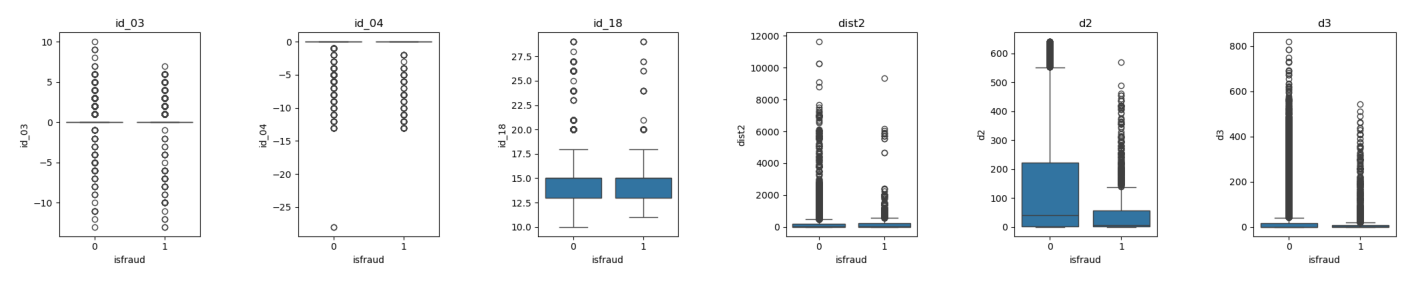

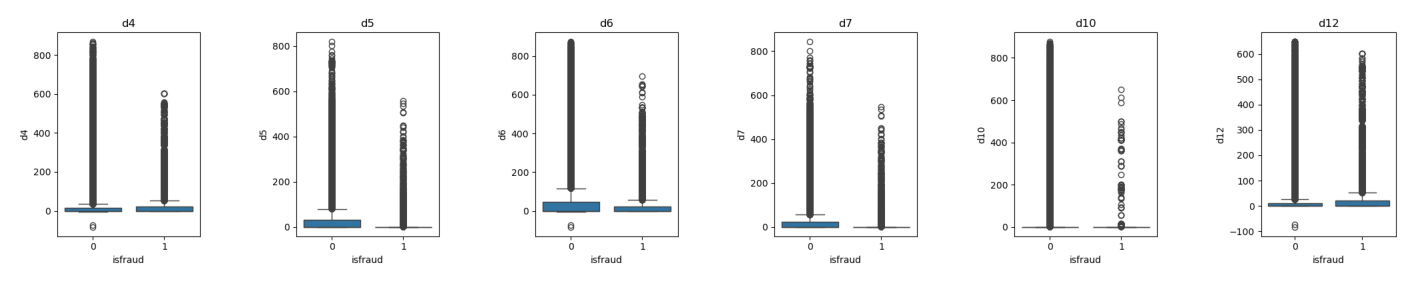

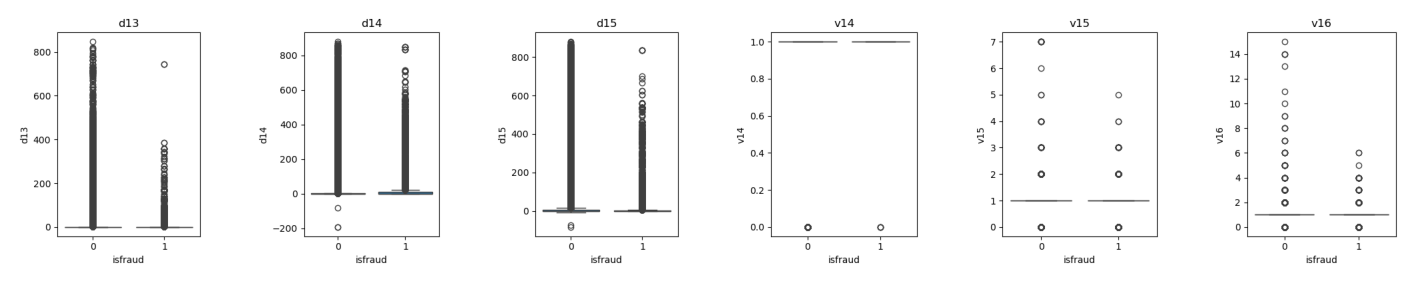

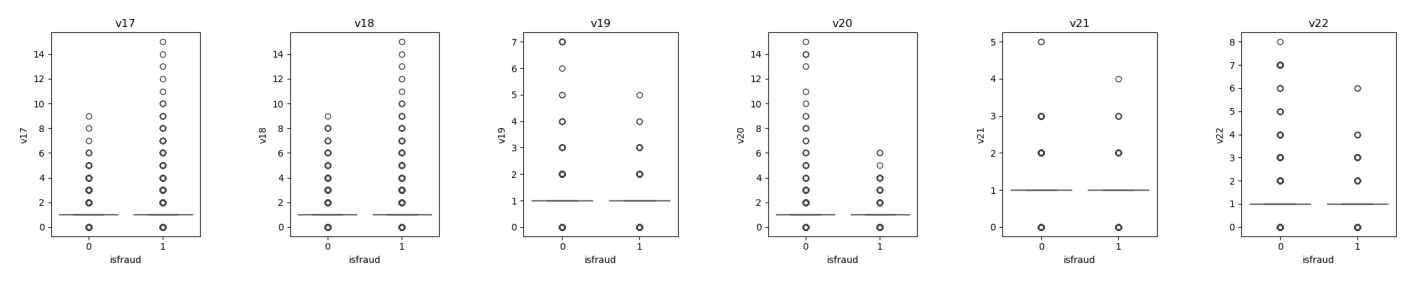

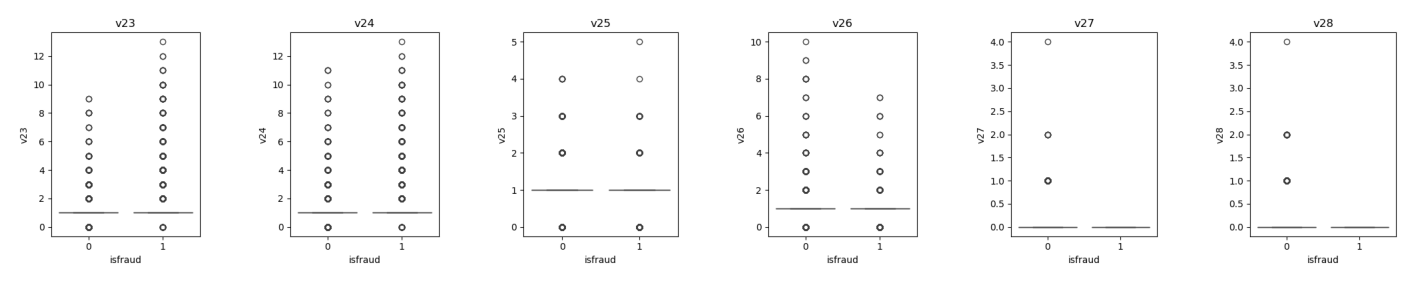

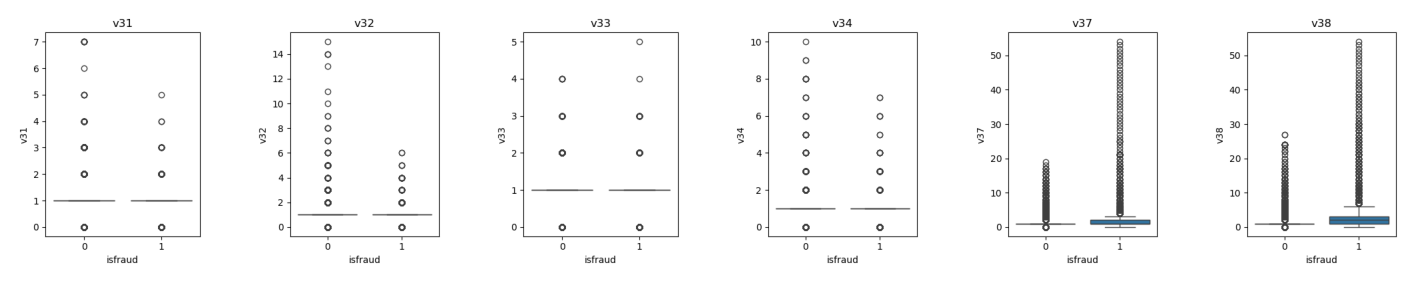

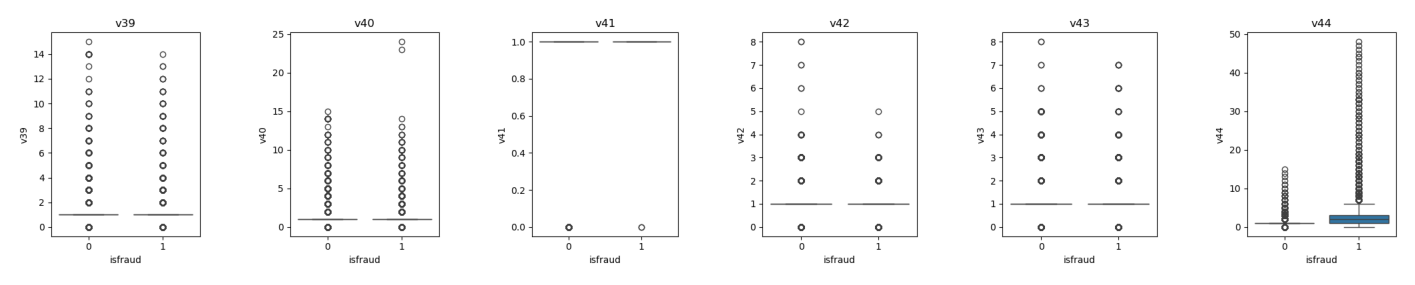

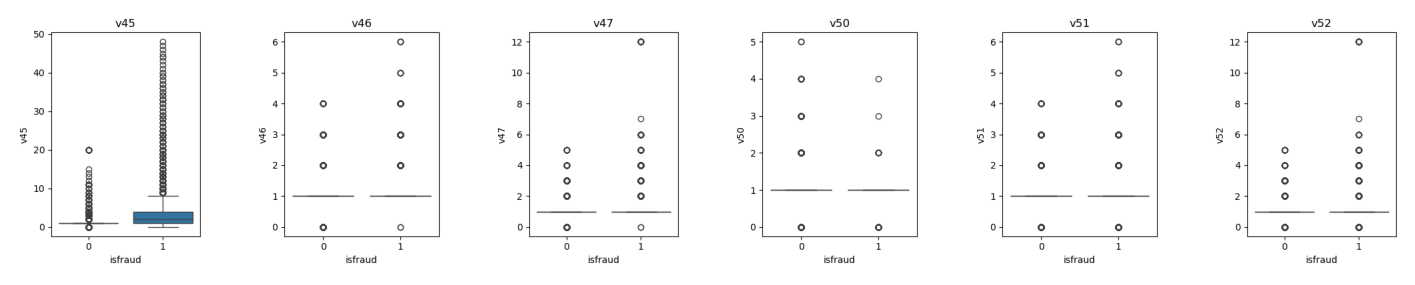

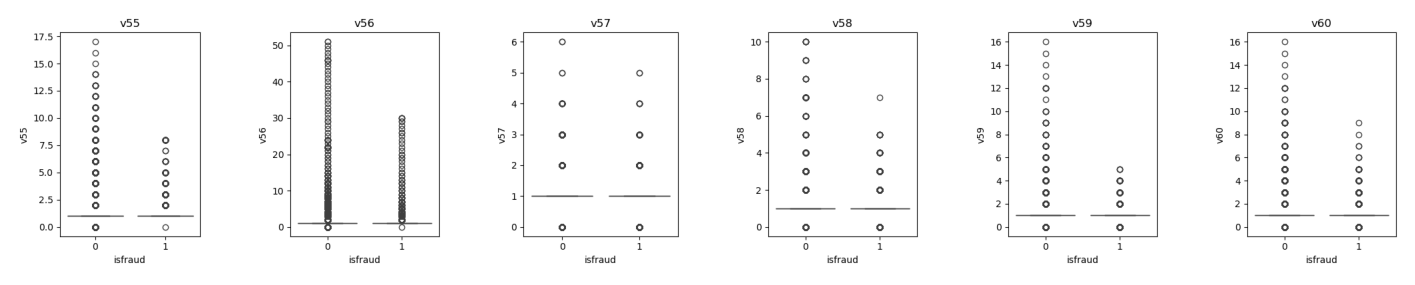

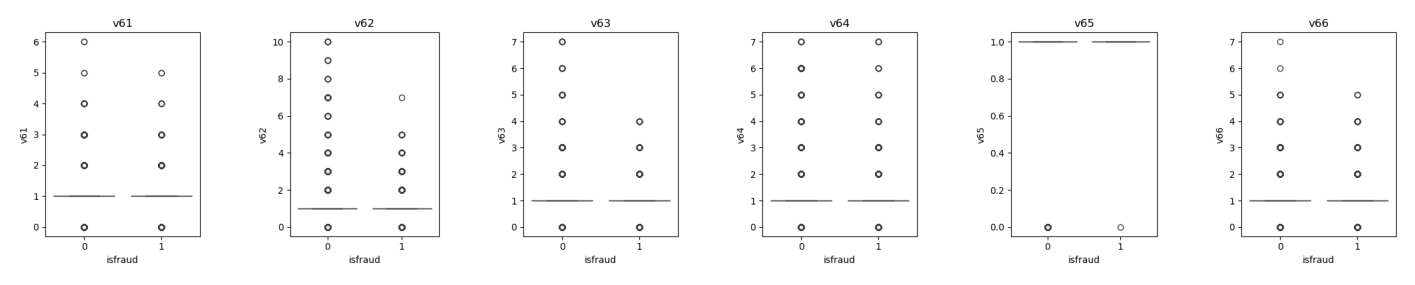

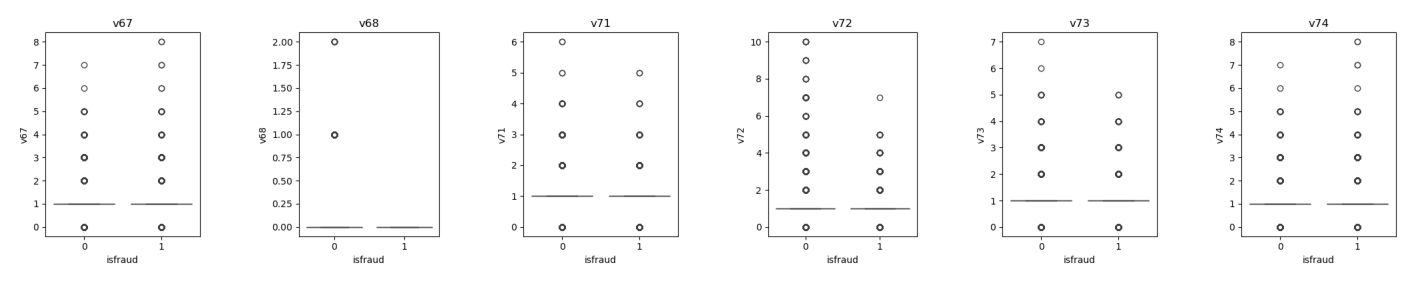

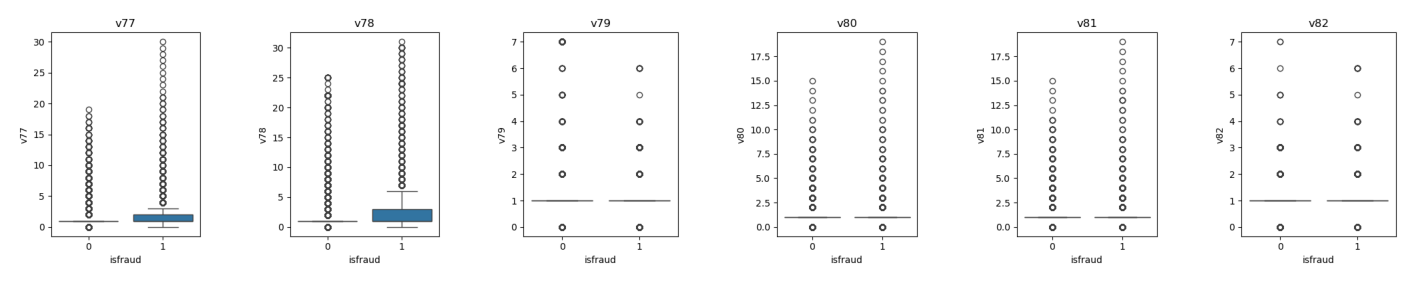

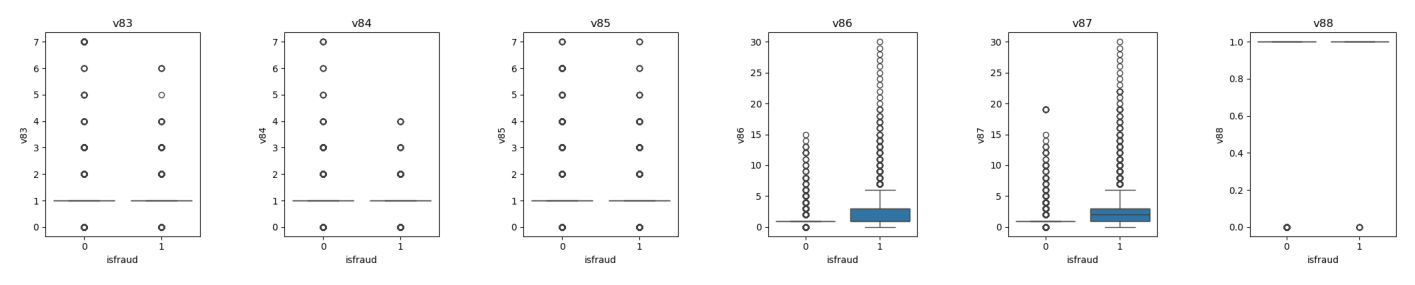

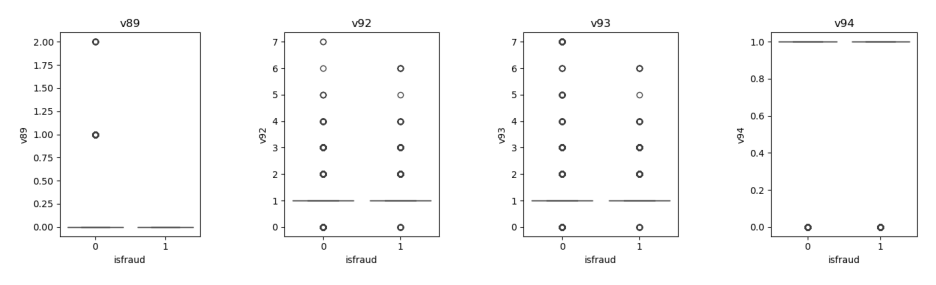

In [27]:
# Mostrar en bloques de 6
cols = 6
imgs = [f"boxplots_individuales/{col}.png" for col in numericas_50plus]

for i in range(0, len(imgs), cols):
    fig, axes = plt.subplots(1, cols, figsize=(cols * 3, 4))
    for j, ax in enumerate(axes):
        if i + j < len(imgs):
            img = PILImage.open(imgs[i + j])
            ax.imshow(img)
            ax.axis('off')
        else:
            ax.remove()
    plt.show()


Luego de aplicar la prueba de normalidad de Anderson-Darling y visualizar la relación entre cada variable numérica con más del 50% de valores nulos frente a la variable objetivo isfraud, se evidenció que ninguna presenta una distribución normal ni una diferenciación clara entre clases. En la mayoría de los casos, los datos están concentrados en valores constantes o muy cercanos a cero, acompañados de valores atípicos extremos y sin un patrón útil para distinguir fraudes. Dado que todas estas variables tienen más de la mitad de sus datos ausentes y no aportan información relevante al problema de clasificación, su imputación representaría un riesgo considerable de introducir ruido. Por tanto, se decide eliminarlas por completo del conjunto de datos, priorizando así la calidad del modelo sobre la cantidad de variables.

In [33]:
# Eliminar TODAS las columnas con más del 50% de NA (sin importar tipo)
umbral = 0.5
columnas_mas50_na = df_reducido.columns[df_reducido.isna().mean() > umbral]
df_reducido_2 = df_reducido.drop(columns=columnas_mas50_na)

# Confirmar
print(f"Columnas eliminadas por >50% NA (sin importar tipo): {len(columnas_mas50_na)}")
print(f"Dimensión final del dataframe: {df_reducido_2.shape}")



Columnas eliminadas por >50% NA (sin importar tipo): 83
Dimensión final del dataframe: (144233, 305)


In [35]:
# Calcular porcentaje de NA para las columnas restantes
porcentaje_na_restantes = df_reducido_2.isna().mean().sort_values(ascending=False) * 100

# Filtrar solo columnas que aún tienen NA
variables_con_na = porcentaje_na_restantes[porcentaje_na_restantes > 0]

# Mostrar resultado
print(f"Total de variables con NA restantes: {len(variables_con_na)}")
display(variables_con_na)


Total de variables con NA restantes: 283


id_33            49.187079
d9               48.052110
id_09            48.052110
d8               48.052110
id_10            48.052110
id_30            46.222432
id_32            46.207872
id_34            46.056034
id_14            44.503685
v147             43.399222
v146             43.399222
v155             43.399222
v148             43.399222
v154             43.399222
v149             43.399222
v157             43.399222
v158             43.399222
v163             43.399222
v142             43.399222
v162             43.399222
v161             43.399222
v141             43.399222
v140             43.399222
v139             43.399222
v156             43.399222
v138             43.399222
v153             43.399222
v152             43.395062
v160             43.395062
v159             43.395062
v151             43.395062
v150             43.395062
v145             43.395062
v143             43.395062
v164             43.395062
v165             43.395062
v166             43.395062
v

In [46]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df_reducido_2.select_dtypes(include=['float64', 'int64']).copy()

variables_eliminadas = []
vif_valores = []

while True:
    # Usar solo filas sin NA
    df_temp = df_vif.dropna()

    if df_temp.shape[0] < 1000:
        print("Muy pocas filas completas para continuar el análisis VIF.")
        break

    # Eliminar columnas con varianza cero (constantes)
    constantes = df_temp.loc[:, df_temp.std() == 0].columns.tolist()
    if constantes:
        print("Columnas constantes eliminadas:", constantes)
        df_vif.drop(columns=constantes, inplace=True)
        variables_eliminadas.extend(constantes)
        vif_valores.extend([np.inf] * len(constantes))
        continue

    # Calcular VIF
    vif = pd.DataFrame()
    vif["Variable"] = df_temp.columns
    vif["VIF"] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]

    max_vif = vif["VIF"].max()
    if max_vif < 10:
        print("Todas las variables tienen VIF < 10.")
        break

    variable_a_eliminar = vif.sort_values("VIF", ascending=False).iloc[0]
    var_name = variable_a_eliminar["Variable"]
    var_vif = variable_a_eliminar["VIF"]

    print(f"Eliminando: {var_name} con VIF = {var_vif:.2f}")
    variables_eliminadas.append(var_name)
    vif_valores.append(var_vif)

    df_vif.drop(columns=[var_name], inplace=True)

# Resumen
vif_resumen = pd.DataFrame({
    "Variable eliminada": variables_eliminadas,
    "VIF en el momento de eliminación": vif_valores
})

print("\nResumen de variables eliminadas por VIF:")
print(vif_resumen)

df_final_vif = df_vif.copy()


Columnas constantes eliminadas: ['c5', 'c7', 'c9', 'c12', 'v107', 'v305']
Eliminando: v97 con VIF = 1793997.02
Eliminando: v219 con VIF = 756955.88
Eliminando: v128 con VIF = 440252.04
Eliminando: v280 con VIF = 418069.62
Eliminando: v265 con VIF = 304427.76
Eliminando: v95 con VIF = 294662.47
Eliminando: v217 con VIF = 205755.07
Eliminando: v96 con VIF = 133369.59
Eliminando: v308 con VIF = 130699.89
Eliminando: v293 con VIF = 113691.24
Eliminando: v127 con VIF = 102102.68
Eliminando: v218 con VIF = 88382.55
Eliminando: v202 con VIF = 69334.71
Eliminando: v324 con VIF = 58054.58
Eliminando: v241 con VIF = 45772.76
Eliminando: v179 con VIF = 41527.63
Eliminando: v167 con VIF = 34601.32
Eliminando: v306 con VIF = 32611.40
Eliminando: v103 con VIF = 32395.61
Eliminando: v204 con VIF = 25054.83
Eliminando: v264 con VIF = 20309.85
Eliminando: v295 con VIF = 19287.31
Eliminando: transactionid con VIF = 18202.32
Eliminando: v323 con VIF = 14264.58
Eliminando: v113 con VIF = 13653.97
Eliminan

Para asegurar que las variables independientes del modelo no presenten multicolinealidad severa, se aplicó un procedimiento iterativo utilizando el Factor de Inflación de Varianza (VIF). La lógica del proceso fue eliminar, en cada iteración, la variable con mayor VIF si su valor era superior al umbral de 10, recalculando los VIF del resto de variables después de cada eliminación. Esta estrategia se repitió hasta garantizar que todas las variables numéricas restantes tuvieran VIF < 10.  Antes de iniciar este proceso, se eliminaron las columnas constantes, es decir, aquellas que presentaban un único valor en todas las observaciones. Este tipo de variables carece completamente de varianza, por lo que no aportan información útil al modelo y generan problemas numéricos al momento de calcular el VIF, ya que su varianza residual es cero, lo cual puede inducir divisiones por cero o VIF infinitos. La eliminación de estas columnas fue un paso previo indispensable para evitar errores y asegurar la estabilidad del análisis de multicolinealidad.

El resultado final fue la eliminación de 214 variables con VIF extremadamente elevados, algunos superiores a 1.000.000, evidenciando redundancias severas en el conjunto de datos original. Tras la limpieza iterativa, se conservó un subconjunto de variables independientes con multicolinealidad aceptable, aptas para ser utilizadas en la etapa de modelado. Seguidamente, se procede a anaizar la multicolinealdiad de variables categóricas y ver si este procesamiento resulta en una reducción de la dimensión. 

In [70]:
from scipy.stats import chi2_contingency
from itertools import combinations

# Filtrar variables categóricas del dataframe final tras VIF
cat_cols = df_final_vif.select_dtypes(include=['object', 'category']).columns.tolist()

# Lista para guardar resultados significativos
chi2_resultados = []

# Evaluar pares de variables categóricas
for var1, var2 in combinations(cat_cols, 2):
    try:
        tabla = pd.crosstab(df_final_vif[var1], df_final_vif[var2])
        if tabla.shape[0] > 1 and tabla.shape[1] > 1:
            chi2, p, _, _ = chi2_contingency(tabla)
            if p < 0.05:
                chi2_resultados.append((var1, var2, p))
    except Exception as e:
        pass  # Ignorar errores por categorías vacías o problemas numéricos

# Convertir a dataframe
df_chi2 = pd.DataFrame(chi2_resultados, columns=['var1', 'var2', 'p_valor'])

# Contar ocurrencias para saber cuáles eliminar
contadores = pd.Series(df_chi2[['var1', 'var2']].values.ravel()).value_counts()

# Variables candidatas a eliminar (las más repetidas en dependencias)
vars_dependientes = contadores.index.tolist()

# Eliminar una a una y recomputar dependencias hasta dejar solo independientes
eliminadas = []
while True:
    pares_dependientes = []
    for var1, var2 in combinations(cat_cols, 2):
        if var1 in df_final_vif.columns and var2 in df_final_vif.columns:
            try:
                tabla = pd.crosstab(df_final_vif[var1], df_final_vif[var2])
                if tabla.shape[0] > 1 and tabla.shape[1] > 1:
                    chi2, p, _, _ = chi2_contingency(tabla)
                    if p < 0.05:
                        pares_dependientes.append((var1, var2))
            except:
                continue
    if not pares_dependientes:
        break
    # Eliminar la variable más frecuente entre las dependientes
    plano = pd.Series([x for par in pares_dependientes for x in par])
    var_a_eliminar = plano.value_counts().idxmax()
    df_final_vif.drop(columns=var_a_eliminar, inplace=True)
    eliminadas.append(var_a_eliminar)
    cat_cols.remove(var_a_eliminar)

# Mostrar resumen
print(f"Total de variables categóricas eliminadas por dependencia chi2: {len(eliminadas)}")
print("Variables eliminadas:", eliminadas)


Total de variables categóricas eliminadas por dependencia chi2: 18
Variables eliminadas: ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_36', 'id_37', 'devicetype', 'deviceinfo', 'productcd', 'card4', 'p_emaildomain', 'r_emaildomain', 'id_30', 'id_33', 'id_34', 'id_35']


Luego de reducir la dimensionalidad de las variables numéricas mediante la eliminación iterativa por VIF, se procedió a analizar la multicolinealidad entre las variables categóricas. Para esto, se aplicó la prueba de chi-cuadrado de independencia (`chi2_contingency`) a todos los pares posibles de variables categóricas restantes. Esta prueba permite evaluar si existe una relación estadísticamente significativa entre dos variables cualitativas, y se considera que hay dependencia si el valor p es menor a 0.05. En tal caso, se interpreta que ambas variables están correlacionadas y aportan información redundante al modelo.

A partir de los pares dependientes identificados, se eliminaron de forma iterativa aquellas variables que más frecuentemente aparecían en relaciones dependientes, con el fin de conservar únicamente aquellas que aportan información independiente. Como resultado de este proceso, se eliminaron 18 variables categóricas, entre ellas `'id_12'`, `'id_15'`, `'id_28'`, `'devicetype'`, `'deviceinfo'`, `'productcd'` y `'card4'`, entre otras. Esta depuración permite optimizar el dataset para las siguientes etapas del modelado, evitando sesgos por redundancia y mejorando la interpretabilidad del modelo final.


In [71]:
print(f"Dimensiones finales del dataset completo tras VIF y chi²: {df_final_vif.shape}")



Dimensiones finales del dataset completo tras VIF y chi²: (144233, 73)


In [72]:
na_por_variable = df_final_vif.isna().sum()
na_pct = df_final_vif.isna().mean() * 100

# Combinar ambos en un DataFrame
na_resumen = pd.DataFrame({
    'Total NA': na_por_variable,
    'Porcentaje NA': na_pct
})

# Filtrar solo las que tienen NA y ordenar por porcentaje
na_resumen = na_resumen[na_resumen['Total NA'] > 0].sort_values(by='Porcentaje NA', ascending=False)

print(f"Total de variables con NA en df_final_vif: {len(na_resumen)}")
display(na_resumen)


Total de variables con NA en df_final_vif: 66


,Total NA,Porcentaje NA
id_09,69307,48.052110
id_10,69307,48.052110
d8,69307,48.052110
d9,69307,48.052110
v161,62596,43.399222
v138,62596,43.399222
v149,62596,43.399222
v146,62596,43.399222
v142,62596,43.399222
v162,62596,43.399222


In [75]:
# Contar columnas numéricas
num_cols = df_final_vif.select_dtypes(include=['int64', 'float64']).columns
print(f"Columnas numéricas: {len(num_cols)}")

# Contar columnas no numéricas (object o category)
non_num_cols = df_final_vif.select_dtypes(exclude=['int64', 'float64']).columns
print(f"Columnas no numéricas (object/category): {len(non_num_cols)}")


Columnas numéricas: 71
Columnas no numéricas (object/category): 2


In [76]:
# Mostrar nombres de columnas numéricas
print("\nNombres de columnas numéricas:")
print(num_cols.tolist())

# Mostrar nombres de columnas no numéricas
print("\nNombres de columnas no numéricas:")
print(non_num_cols.tolist())



Nombres de columnas numéricas:
['id_01', 'id_02', 'id_05', 'id_06', 'id_09', 'id_10', 'id_19', 'id_20', 'isfraud', 'transactiondt', 'transactionamt', 'card1', 'card2', 'addr1', 'c3', 'c14', 'd1', 'd8', 'd9', 'v98', 'v124', 'v135', 'v138', 'v140', 'v141', 'v142', 'v146', 'v149', 'v152', 'v159', 'v160', 'v161', 'v162', 'v164', 'v169', 'v172', 'v173', 'v174', 'v175', 'v177', 'v184', 'v185', 'v208', 'v220', 'v223', 'v224', 'v225', 'v226', 'v227', 'v229', 'v238', 'v250', 'v261', 'v267', 'v271', 'v274', 'v277', 'v281', 'v282', 'v286', 'v287', 'v289', 'v291', 'v296', 'v301', 'v311', 'v313', 'v314', 'v326', 'v335', 'v338']

Nombres de columnas no numéricas:
['id_38', 'card6']


In [77]:
import pandas as pd
from sklearn.impute import KNNImputer

# Separar las variables numéricas en dos grupos según porcentaje de NA
# Selecciona todas las columnas numéricas
num_cols = df_final_vif.select_dtypes(include=['float64', 'int64']).columns

# Calcula el porcentaje de NA para cada columna numérica
missing_pct = df_final_vif[num_cols].isna().mean()

# Definir el umbral (40% de NA)
umbral = 0.40

# Grupo alto: variables con más del 40% de NA
group_high = missing_pct[missing_pct > umbral].index.tolist()

# Grupo bajo: variables con 40% o menos de NA
group_low = missing_pct[missing_pct <= umbral].index.tolist()

print("Variables numéricas con >40% NA:")
print(group_high)
print("\nVariables numéricas con ≤40% NA:")
print(group_low)

# Imputar primero el grupo alto (más difíciles) con KNNImputer 
imputer_high = KNNImputer(n_neighbors=5)

# Extraer el subconjunto del grupo alto
df_high = df_final_vif[group_high]

# Aplicar imputación al subconjunto; se usa todo el dataframe ya que aún tiene suficientes filas
df_high_imputed = pd.DataFrame(imputer_high.fit_transform(df_high),
                               columns=group_high,
                               index=df_final_vif.index)

# Reemplazar las columnas imputadas en el DataFrame original
df_intermedio = df_final_vif.copy()
df_intermedio[group_high] = df_high_imputed

# Paso 3: Imputar el grupo bajo (menos NA) con KNNImputer 
imputer_low = KNNImputer(n_neighbors=5)
df_low = df_intermedio[group_low]
df_low_imputed = pd.DataFrame(imputer_low.fit_transform(df_low),
                              columns=group_low,
                              index=df_final_vif.index)

# Actualizar el DataFrame final con el grupo bajo imputado
df_intermedio[group_low] = df_low_imputed

# Paso 4: Verificación final de la imputación en las variables numéricas
print("\nMissing counts en variables numéricas después de la imputación:")
missing_final = df_intermedio[num_cols].isna().sum()
print(missing_final[missing_final > 0])




Variables numéricas con >40% NA:
['id_09', 'id_10', 'addr1', 'd8', 'd9', 'v138', 'v140', 'v141', 'v142', 'v146', 'v149', 'v152', 'v159', 'v160', 'v161', 'v162', 'v164', 'v326', 'v335', 'v338']

Variables numéricas con ≤40% NA:
['id_01', 'id_02', 'id_05', 'id_06', 'id_19', 'id_20', 'isfraud', 'transactiondt', 'transactionamt', 'card1', 'card2', 'c3', 'c14', 'd1', 'v98', 'v124', 'v135', 'v169', 'v172', 'v173', 'v174', 'v175', 'v177', 'v184', 'v185', 'v208', 'v220', 'v223', 'v224', 'v225', 'v226', 'v227', 'v229', 'v238', 'v250', 'v261', 'v267', 'v271', 'v274', 'v277', 'v281', 'v282', 'v286', 'v287', 'v289', 'v291', 'v296', 'v301', 'v311', 'v313', 'v314']

Missing counts en variables numéricas después de la imputación:
Series([], dtype: int64)


In [78]:
# Recalcular cantidad y porcentaje de NA tras imputación numérica
na_por_variable = df_intermedio.isna().sum()
na_pct = df_intermedio.isna().mean() * 100

# Unir en un resumen y filtrar solo columnas con NA
na_resumen = pd.DataFrame({
    'Total NA': na_por_variable,
    'Porcentaje NA': na_pct
})
na_resumen = na_resumen[na_resumen['Total NA'] > 0].sort_values(by='Porcentaje NA', ascending=False)

# Mostrar
print(f"Total de variables con NA después de imputación numérica: {len(na_resumen)}")
display(na_resumen)


Total de variables con NA después de imputación numérica: 2


,Total NA,Porcentaje NA
id_38,3248,2.251912
card6,178,0.123411


In [80]:
# Imputar variables categóricas con moda
cat_cols_na = ['id_38', 'card6']

for col in cat_cols_na:
    moda = df_intermedio[col].mode(dropna=True)[0]
    df_intermedio[col] = df_intermedio[col].fillna(moda)


# Verificación final
na_final = df_intermedio[cat_cols_na].isna().sum()
print("Valores nulos restantes tras imputación categórica:")
print(na_final[na_final > 0])


Valores nulos restantes tras imputación categórica:
Series([], dtype: int64)


In [82]:
# Confirmar dimensiones finales
print(f"Dimensiones finales del DataFrame: {df_intermedio.shape}")

# Confirmar que no quedan NA
nulos_totales = df_intermedio.isna().sum()
nulos_totales = nulos_totales[nulos_totales > 0]
print(f"Total de columnas con NA restantes: {len(nulos_totales)}")
if not nulos_totales.empty:
    print(nulos_totales)
else:
    print("No quedan valores nulos en el DataFrame.")

# Columnas numéricas imputadas con KNN
num_cols = df_final_vif.select_dtypes(include=['float64', 'int64']).columns
cols_imputadas_knn = num_cols[df_final_vif[num_cols].isna().sum() > 0]
print(f"Total de columnas imputadas con KNN: {len(cols_imputadas_knn)}")
print("Columnas imputadas con KNN:", cols_imputadas_knn.tolist())

# Columnas categóricas imputadas con moda
cols_imputadas_moda = ['id_38', 'card6']
print(f"\nTotal de columnas imputadas con moda: {len(cols_imputadas_moda)}")
print("Columnas imputadas con moda:", cols_imputadas_moda)



Dimensiones finales del DataFrame: (144233, 73)
Total de columnas con NA restantes: 0
No quedan valores nulos en el DataFrame.
Total de columnas imputadas con KNN: 64
Columnas imputadas con KNN: ['id_02', 'id_05', 'id_06', 'id_09', 'id_10', 'id_19', 'id_20', 'card2', 'addr1', 'd1', 'd8', 'd9', 'v98', 'v124', 'v135', 'v138', 'v140', 'v141', 'v142', 'v146', 'v149', 'v152', 'v159', 'v160', 'v161', 'v162', 'v164', 'v169', 'v172', 'v173', 'v174', 'v175', 'v177', 'v184', 'v185', 'v208', 'v220', 'v223', 'v224', 'v225', 'v226', 'v227', 'v229', 'v238', 'v250', 'v261', 'v267', 'v271', 'v274', 'v277', 'v281', 'v282', 'v286', 'v287', 'v289', 'v291', 'v296', 'v301', 'v311', 'v313', 'v314', 'v326', 'v335', 'v338']

Total de columnas imputadas con moda: 2
Columnas imputadas con moda: ['id_38', 'card6']


Para imputar los valores faltantes en el conjunto de datos final, se decidió aplicar una estrategia diferenciada según el tipo de variable. En el caso de las variables numéricas, se optó por técnicas de imputación basadas en ``K-Nearest Neighbors (KNN)``, que se aplicaron a un total de 64 columnas. La elección de este método se basa en su capacidad para inferir valores ausentes a partir de patrones de similitud entre observaciones, lo cual resulta más robusto que una imputación simple por media o mediana. A diferencia de estas últimas, KNN toma en cuenta la estructura multivariable del conjunto de datos, ayudando a preservar las relaciones internas entre atributos. Además, como las pruebas de normalidad indicaron que las variables numéricas no seguían una distribución gaussiana, los métodos tradicionales (como la media) podían introducir sesgos no deseados.

Para las variables categóricas, en cambio, se utilizó la imputación por moda, es decir, asignando el valor más frecuente dentro de cada columna. Aunque se trata de una técnica sencilla, es especialmente útil cuando el número de categorías es reducido y una clase predomina claramente, como ocurrió con las variables ``id_38`` y ``card6``. En este caso, otras alternativas como introducir etiquetas genéricas (“desconocido”) o codificaciones especiales no aportaban ventajas reales, e incluso podían generar niveles artificiales sin relevancia analítica.

Gracias a esta estrategia combinada, se logró eliminar por completo los valores nulos del conjunto de datos, manteniendo la consistencia estructural tanto en variables numéricas como categóricas. Esto permitió avanzar hacia las siguientes etapas de modelado con una base de datos limpia y bien estructurada.

In [84]:
# Exportar el DataFrame final a CSV
df_intermedio.to_csv("dataset_final.csv", index=False)

# Confirmar
print("Archivo exportado exitosamente")


Archivo exportado exitosamente
